In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5_regular_season
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.specific.game_durations import game_durations
from triple_agent.reports.specific.scl_set_scores import game_differential
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

In [5]:
placement_players = {
    "mintyrug"
    "lazybear",
    "iggythegrifter",
    "hunu",
    "Kmars133",
    "Ryooo",
    "OpiWrites",
    "Calvin Schoolidge",
    "Watermeat",
    "skrewwl00se",
    "Silverthorn",
    "furbyfubar",
    "Cartwright",
    "Hectic",
    "pofke",
    "ninjafairy",
} - SCL5_DROPPED_PLAYERS

In [6]:
placement_spy_matches = list(filter(lambda g: g.spy in placement_players, scl5_replays))
placement_sniper_matches = list(filter(lambda g: g.sniper in placement_players, scl5_replays))

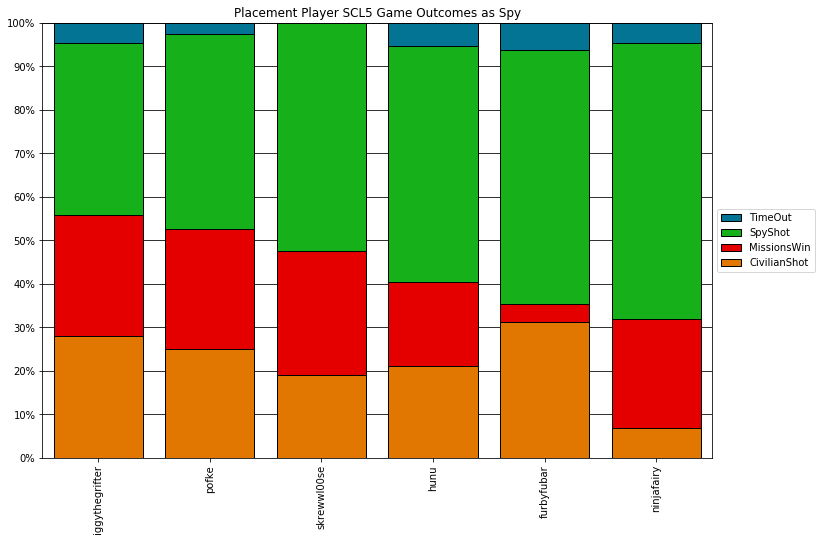

DataPlotProperties(frame=                      iggythegrifter  pofke  skrewwl00se      hunu  \
WinType.TimeOut             0.046512  0.025     0.000000  0.052632   
WinType.SpyShot             0.395349  0.450     0.523810  0.543860   
WinType.MissionsWin         0.279070  0.275     0.285714  0.192982   
WinType.CivilianShot        0.279070  0.250     0.190476  0.210526   

                      furbyfubar  ninjafairy  
WinType.TimeOut         0.062500    0.045455  
WinType.SpyShot         0.583333    0.636364  
WinType.MissionsWin     0.041667    0.250000  
WinType.CivilianShot    0.312500    0.068182  , stacks_are_categories=False)

In [7]:
game_outcomes(
    placement_spy_matches,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        percent_normalized_data = True
    ),
    axis_properties=AxisProperties(title="Placement Player SCL5 Game Outcomes as Spy")
)

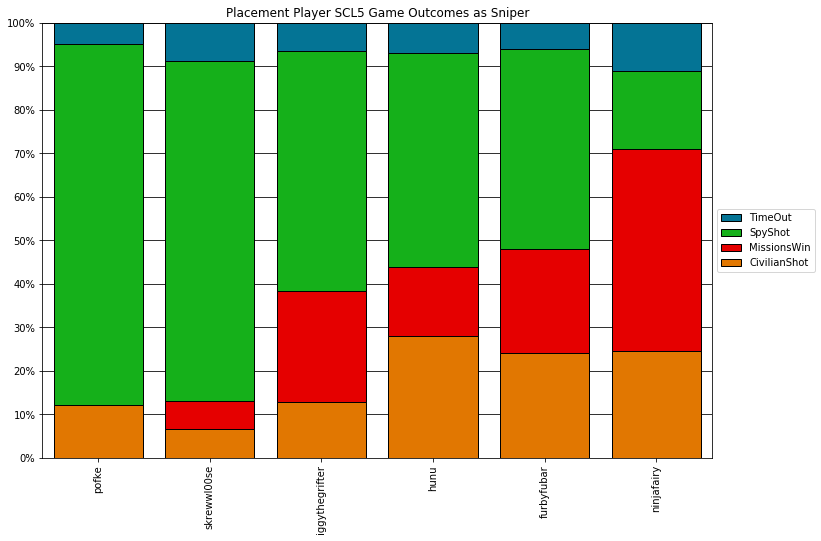

DataPlotProperties(frame=                         pofke  skrewwl00se  iggythegrifter      hunu  \
WinType.TimeOut       0.048780     0.086957        0.063830  0.070175   
WinType.SpyShot       0.829268     0.782609        0.553191  0.491228   
WinType.MissionsWin   0.000000     0.065217        0.255319  0.157895   
WinType.CivilianShot  0.121951     0.065217        0.127660  0.280702   

                      furbyfubar  ninjafairy  
WinType.TimeOut             0.06    0.111111  
WinType.SpyShot             0.46    0.177778  
WinType.MissionsWin         0.24    0.466667  
WinType.CivilianShot        0.24    0.244444  , stacks_are_categories=False)

In [8]:
game_outcomes(
    placement_sniper_matches,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        percent_normalized_data = True
    ),
    axis_properties=AxisProperties(title="Placement Player SCL5 Game Outcomes as Sniper")
)